***1. Importing Library***

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

***2. Load Dataset***

In [4]:
df=pd.read_csv("/content/EUI students sleeping patterns.csv")

***3. Dataset Overview***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                      --------------  ----- 
 0   Timestamp                                                                                                                                                                                   37 non-null     object
 1   Academic Year                                                                                                                                                                               37 non-null     object
 2   Gender                      

In [6]:
df.head()

,Timestamp,Academic Year,Gender,How far do you live from campus ?,How much sleep do you get on Average after coming home from University ? (in Minutes),"On a scale of 1 to 5, how much do you feel you have enough time to get your work done (University related i.e. studying, assignments, etc..) at home after returning from university?","On a scale of 1 to 5, how much do you feel you have enough time for personal activities (Non-University related i.e. going out, exercise, sports, etc..) after returning from university?",When do you usually go to sleep at night ?,How many hours do you sleep at night on average ?,How would you rate your overall sleep quality ?
0,2025/03/10 8:46:31 PM GMT+2,Sophomore,Male,50-59 Minutes,60,3,1,00:00,7,3
1,2025/03/10 8:51:42 PM GMT+2,Sophomore,Male,30-39 Minutes,120,3,3,12:00,6,4
2,2025/03/10 8:55:28 PM GMT+2,Sophomore,Female,20-29 Minutes,250,1,2,01:00,6,2
3,2025/03/10 9:05:20 PM GMT+2,Sophomore,Male,40-49 Minutes,40,1,2,22:00,8,4
4,2025/03/10 9:05:55 PM GMT+2,Sophomore,Male,30-39 Minutes,0,3,2,00:00,7,4


***4. Drop Timestamp Column***

In [7]:
df=df.drop("Timestamp",axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                      --------------  ----- 
 0   Academic Year                                                                                                                                                                               37 non-null     object
 1   Gender                                                                                                                                                                                      37 non-null     object
 2   How far do you live from camp

***5. Rename Columns for Readability***

In [9]:
df=df.rename(columns={"How far do you live from campus ?":"Minutes from campus", "How much sleep do you get on Average after coming home from University ? (in Minutes)":"Sleep after Uni","On a scale of 1 to 5, how much do you feel you have enough time to get your work done (University related i.e. studying, assignments, etc..) at home after returning from university? ":"AssignmentTime (1-5)","On a scale of 1 to 5, how much do you feel you have enough time for personal activities (Non-University related i.e. going out, exercise, sports, etc..) after returning from university? ":"ActivitiesTime (1-5)","When do you usually go to sleep at night ?":"BedTime", "How many hours do you sleep at night on average ?":"SleepDuration (hrs)", "How would you rate your overall sleep quality ?":"SleepQuality (1-5)" })

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Academic Year         37 non-null     object
 1   Gender                37 non-null     object
 2   Minutes from campus   37 non-null     object
 3   Sleep after Uni       37 non-null     int64 
 4   AssignmentTime (1-5)  37 non-null     int64 
 5   ActivitiesTime (1-5)  37 non-null     int64 
 6   BedTime               37 non-null     object
 7   SleepDuration (hrs)   37 non-null     int64 
 8   SleepQuality (1-5)    37 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ KB


***6. Clean ‘Sleep after Uni’ Column***                       
Purpose: Convert suspiciously low values (likely entered in hours) to minutes.

In [11]:
df.loc[df['Sleep after Uni'] < 10, 'Sleep after Uni'] *= 60

***7. Remove Outliers***

In [ ]:
df=df.drop(df[df['SleepDuration (hrs)'] >= 15].index)

***8. Describe Dataset***

In [12]:
df.describe()

,Sleep after Uni,AssignmentTime (1-5),ActivitiesTime (1-5),SleepDuration (hrs),SleepQuality (1-5)
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,92.162162,2.810811,2.432432,6.756757,2.810811
std,102.473171,0.938019,1.093936,2.046751,1.075945
min,0.000000,1.000000,1.000000,3.000000,1.000000
25%,0.000000,2.000000,2.000000,6.000000,2.000000
50%,60.000000,3.000000,2.000000,7.000000,3.000000
75%,120.000000,3.000000,3.000000,7.000000,4.000000
max,420.000000,4.000000,5.000000,15.000000,5.000000


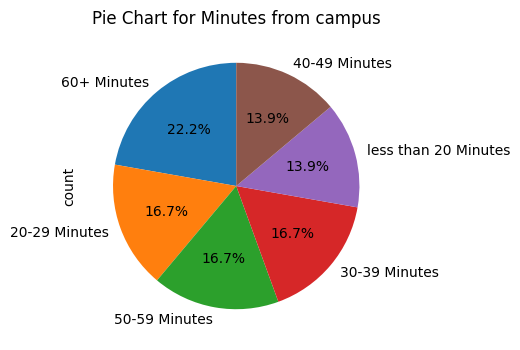

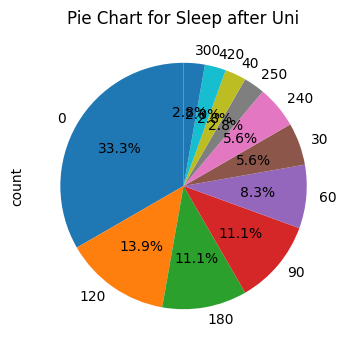

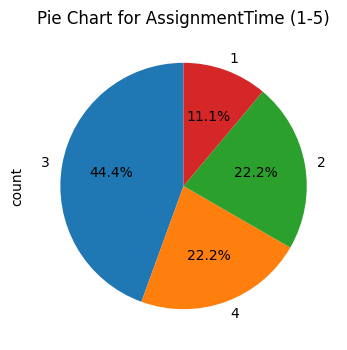

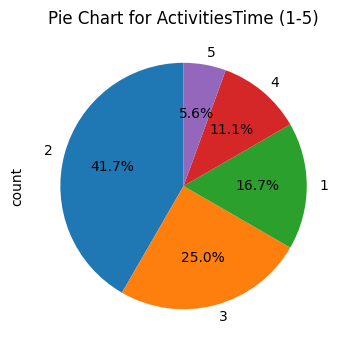

In [29]:
# prompt: generate pie charts on different data columns (but make them smaller)

import matplotlib.pyplot as plt

# Assuming you want pie charts for 'Minutes from campus', 'Sleep after Uni', etc.
for column in ['Minutes from campus', 'Sleep after Uni', 'AssignmentTime (1-5)', 'ActivitiesTime (1-5)']:
  plt.figure(figsize=(4, 4))  # Adjust the figure size to make it smaller
  df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie Chart for {column}')
  plt.show()


***9. Create Categorical Ordering for Commute Time***

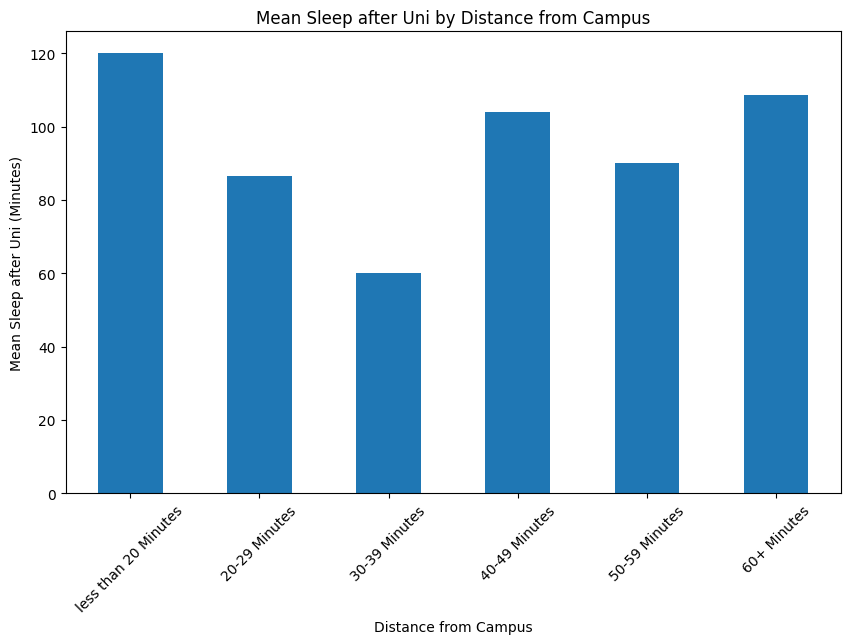

In [16]:
# Group by 'Minutes from campus' and calculate the mean of 'Sleep after Uni'
mean_sleep_by_campus_distance = df.groupby('Minutes from campus')['Sleep after Uni'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
mean_sleep_by_campus_distance.plot(kind='bar')
plt.title('Mean Sleep after Uni by Distance from Campus')
plt.xlabel('Distance from Campus')
plt.ylabel('Mean Sleep after Uni (Minutes)')
plt.xticks(rotation=45)
plt.show()


***11. Anova Test***                                         


Purpose: Test if Sleep after Uni differs significantly across commute distances.
Output: Prints F-statistic and p-value.


In [17]:
from scipy.stats import f_oneway
groups = [group['Sleep after Uni'].dropna().values
          for name, group in df.groupby('Minutes from campus')]
anova_result = f_oneway(*groups)
print('F-statistic:', anova_result.statistic)
print('p-value:', anova_result.pvalue)


F-statistic: 0.218157241779289
p-value: 0.9519715961662979


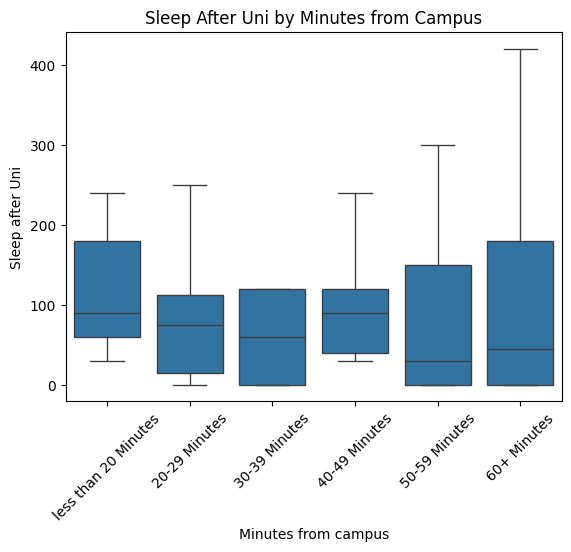

In [18]:
sns.boxplot(data=df, x='Minutes from campus', y='Sleep after Uni')
plt.title('Sleep After Uni by Minutes from Campus')
plt.xticks(rotation=45)
plt.show()


***12. Correlation: Sleep after Uni vs Sleep Duration***

In [24]:
from scipy.stats import pearsonr

# Extract relevant columns
x = df['Sleep after Uni']
y = df['SleepDuration (hrs)']


# Calculate Pearson correlation and p-value
corr, p_two_tailed = pearsonr(x,y)
if corr < 0:
    p_one_tailed = p_two_tailed / 2
else:
    p_one_tailed = 1 - (p_two_tailed / 2)
print('Pearson correlation coefficient:', corr)
print('p-value:', p_one_tailed)
print("There is no Correlation")

Pearson correlation coefficient: -0.007264027623442632
p-value: 0.4832308162896804
There is no Correlation


***13. Boxplot: Sleep Duration vs Sleep Quality***

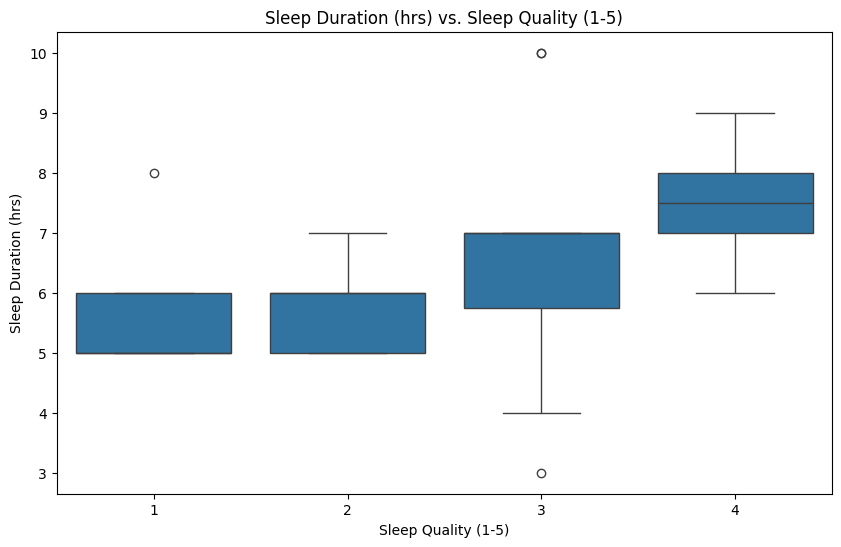

In [20]:
# Create a boxplot of SleepDuration (hrs) and SleepQuality (1-5)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SleepQuality (1-5)', y='SleepDuration (hrs)')
plt.title('Sleep Duration (hrs) vs. Sleep Quality (1-5)')
plt.xlabel('Sleep Quality (1-5)')
plt.ylabel('Sleep Duration (hrs)')
plt.show()


***Correlation Analysis: Computes Pearson’s r and p-value***

In [21]:
corr, p_value = pearsonr(df['SleepDuration (hrs)'], df['SleepQuality (1-5)'])
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)
if p_value < 0.05:
    print("✅ There is a significant correlation.")
else:
    print("❌ No significant correlation.")

Pearson correlation coefficient: 0.3987149870701398
p-value: 0.016009551424852067
✅ There is a significant correlation.


***14. Boxplot: Sleep after Uni vs Sleep Quality***

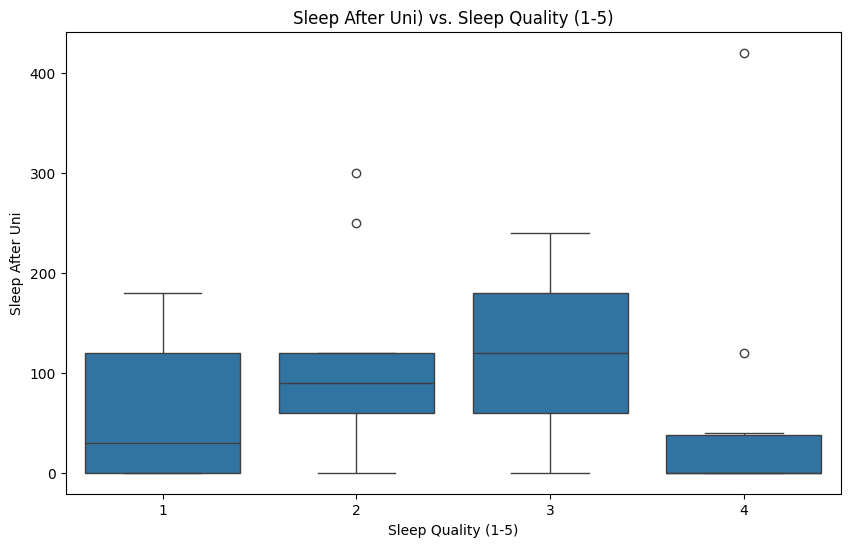

In [22]:
# Create a boxplot of SleepDuration (hrs) and SleepQuality (1-5)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SleepQuality (1-5)', y='Sleep after Uni')
plt.title('Sleep After Uni) vs. Sleep Quality (1-5)')
plt.xlabel('Sleep Quality (1-5)')
plt.ylabel('Sleep After Uni')
plt.show()


***Correlation Analysis: Pearson's r and p-value calculated again.***

In [23]:
corr, p_value = pearsonr(df['Sleep after Uni'], df['SleepQuality (1-5)'])
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)
if p_value < 0.05:
    print("✅ There is a significant correlation.")
else:
    print("❌ No significant correlation.")

Pearson correlation coefficient: -0.0536105679000195
p-value: 0.7561543488636573
❌ No significant correlation.
